# F21 AA Coursework 1




Import


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

import re
from nltk.corpus import stopwords



Loading

In [3]:
df_reviews = pd.read_csv('train.csv')

# Basic Exploration and visualization

In [4]:
df_reviews.head() # Display top 5 rows of data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...


In [5]:
df_reviews.info() #Basic info about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 10 columns):
Id                        426340 non-null int64
ProductId                 426340 non-null object
UserId                    426340 non-null object
ProfileName               426326 non-null object
HelpfulnessNumerator      426340 non-null int64
HelpfulnessDenominator    426340 non-null int64
Score                     426340 non-null int64
Time                      426340 non-null int64
Summary                   426320 non-null object
Text                      426340 non-null object
dtypes: int64(5), object(5)
memory usage: 32.5+ MB


In [6]:
df_reviews.Summary.fillna('',inplace=True)
df_reviews.Text.fillna('', inplace=True)
df_reviews['Summary_text']=df_reviews['Summary']+" "+df_reviews['Text']
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_text
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T..."
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ..."
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...


In [7]:
df_reviews.describe() # Display basic statistics for all numberic attributes

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,426340.000000,426340.000000,426340.000000,426340.000000,4.263400e+05
mean,284300.799618,1.733159,2.220244,4.183455,1.296222e+09
std,164012.600602,7.328184,8.014894,1.310577,4.808061e+07
min,1.000000,0.000000,0.000000,1.000000,9.408096e+08
25%,142363.750000,0.000000,0.000000,4.000000,1.271203e+09
50%,284308.500000,0.000000,1.000000,5.000000,1.311034e+09
75%,426183.250000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,844.000000,923.000000,5.000000,1.351210e+09


In [8]:
df_reviews.loc[0]

Id                                                                   220291
ProductId                                                        B0034EDLS2
UserId                                                        AVF82BC7S0IO7
ProfileName                                                          Kbrown
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     5
Time                                                             1332806400
Summary                                                           Very Good
Text                      I received this product early from the seller!...
Summary_text              Very Good I received this product early from t...
Name: 0, dtype: object

In [9]:
df_reviews.loc[1]

Id                                                                   225833
ProductId                                                        B001I7HJE4
UserId                                                       A1YUL9PCJR3JTY
ProfileName                                 O. Brown "Ms. O. Khannah-Brown"
HelpfulnessNumerator                                                      1
HelpfulnessDenominator                                                    1
Score                                                                     5
Time                                                             1190160000
Summary                   Organic, Kosher, Tasty Assortment of Premium T...
Text                      *****<br />Numi's Collection Assortment Melang...
Summary_text              Organic, Kosher, Tasty Assortment of Premium T...
Name: 1, dtype: object

In [10]:
df_reviews.loc[2]

Id                                                                   350901
ProductId                                                        B000LKTB90
UserId                                                       A1BBPP1EC75JX4
ProfileName                                          Johan Bollen "gekhond"
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     5
Time                                                             1285977600
Summary                   excellent gluten-free spaghetti: great taste, ...
Text                      I was very careful not to overcook this pasta,...
Summary_text              excellent gluten-free spaghetti: great taste, ...
Name: 2, dtype: object

In [11]:
df_reviews.loc[1,'Text']

'*****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts

Text(0.5, 1, 'Null Values in given data')

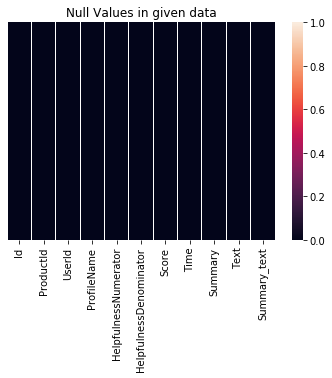

In [14]:
# Heatmap to check null/NaN values
sns.heatmap(df_reviews.isnull(),cbar=True,yticklabels=False)
plt.title('Null Values in given data')

Text(0.5, 1, 'Correlation Matrix')

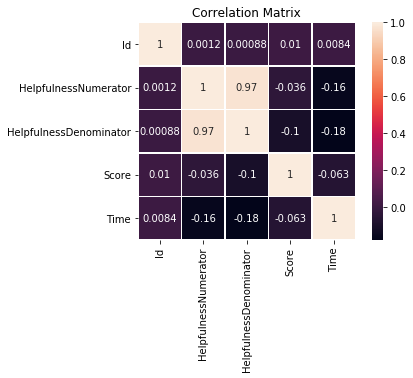

In [15]:
# Plotting a heatmap of the correlation between different variables 
sns.heatmap(df_reviews.corr(),linewidth=0.6,vmax=1.0,square=True,linecolor='white',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Correlation Matrix')
# Helpfulness Numerator and Helpfulness Denominator has 

In [13]:
df_reviews['Score'].value_counts()

5    272492
4     60309
1     39193
3     31993
2     22353
Name: Score, dtype: int64

In [14]:
df_reviews['Id'].value_counts()

2047      1
410211    1
350208    1
348161    1
346114    1
         ..
228154    1
226107    1
215868    1
213821    1
2049      1
Name: Id, Length: 426340, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a853210>,
      dtype=object)

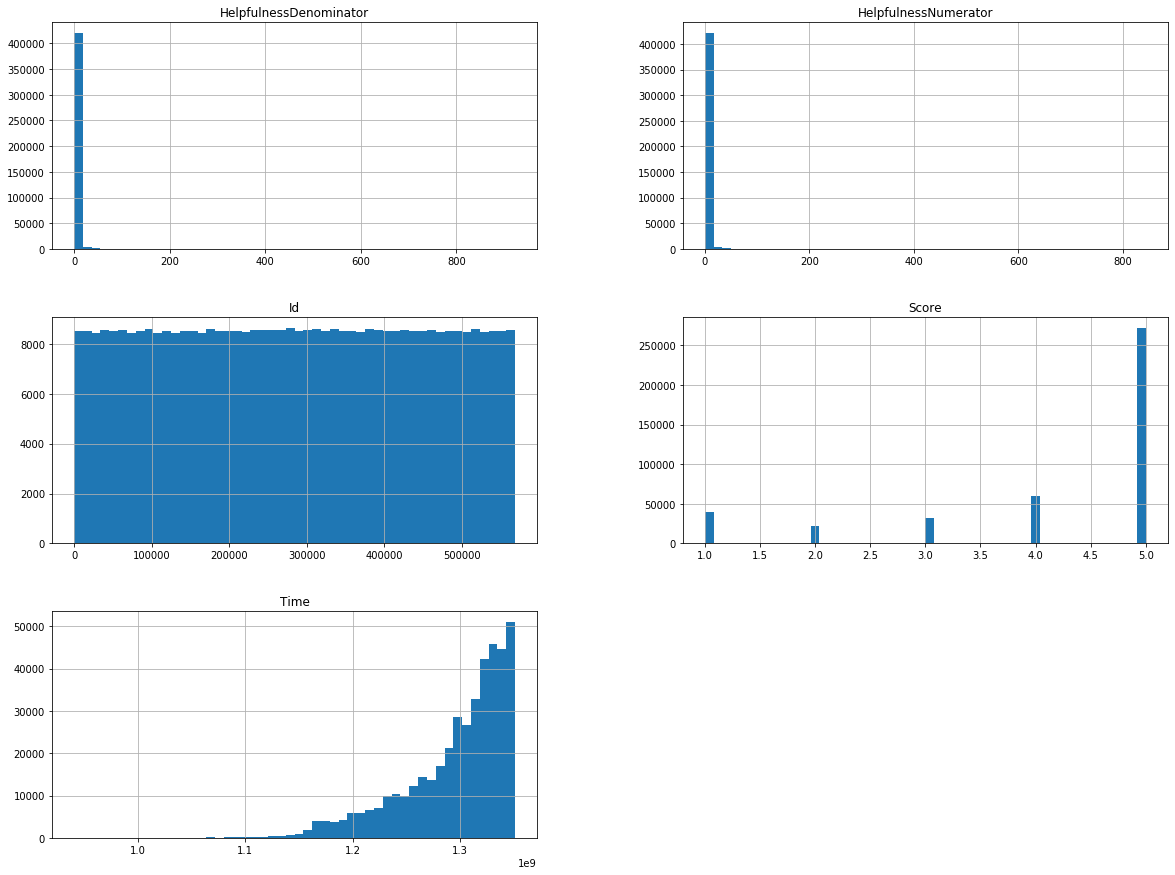

In [15]:
df_reviews.hist(bins=50,figsize=[20,15])

# Preproccessing

In [16]:
df_reviews.columns



Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Summary_text'],
      dtype='object')

In [17]:
df_reviews.HelpfulnessNumerator.max()

844

In [18]:
df_reviews.HelpfulnessNumerator.min()

0

In [19]:
df_reviews.HelpfulnessNumerator.unique()

array([  0,   1,   3,   6,   2,   4,   5,  10,   8,  12,  25,  28,   9,
        13,  33,  16,   7,  20,  11,  17,  19,  21,  18,  39,  37,  52,
        30,  15,  22,  14,  32,  49, 112,  60,  73,  24,  50, 168,  42,
        23,  27,  54,  29, 559,  26,  68,  34,  38, 258,  48,  63,  45,
        41, 117,  35,  36,  46, 119,  31, 121,  44,  47,  69,  40,  88,
        43,  57,  91,  82, 205,  55, 130, 177,  61,  80,  65, 223,  78,
        53, 102, 219,  86,  72,  58,  66, 105, 147,  83, 138,  56, 106,
        64, 446,  71,  77, 145, 538,  70,  51, 149, 472, 116,  76, 232,
        84, 227, 135,  89, 123, 115,  95, 193,  97,  59,  62,  74,  93,
       319,  79, 142, 159, 180, 172, 128,  81, 151, 366, 206, 294, 436,
       209,  92, 110,  96, 262,  94, 212, 158, 129, 178, 454, 107, 355,
       278, 144, 491, 164, 354, 100, 281,  75, 204, 154, 356, 844, 524,
       137, 113, 148,  85, 139, 122,  90, 150, 203,  99, 125, 124, 247,
       439, 321, 264, 118, 466, 104, 141, 488, 349,  67, 303, 13

In [20]:
df_reviews.HelpfulnessDenominator.unique()

array([  0,   1,   3,   4,   6,   2,   5,  10,   7,  11,  23,  43,   8,
        12,  17,  25,  38,  16,  15,  13,  29,  35,   9,  21,  22,  20,
        19,  44,  14,  45,  54,  53,  34,  18,  32,  55, 112,  33,  79,
        84,  24,  69, 192,  26,  42,  30,  48,  27,  28,  31, 562,  68,
        61,  40, 270,  49,  77,  65,  50,  52, 144,  36,  46,  37,  75,
       120, 151,  94,  41, 137,  39,  47,  71,  89,  72, 128,  62,  63,
        83, 229, 135,  98, 180,  66, 228,  81,  56, 110, 263,  51,  88,
        59,  73,  60, 108, 111, 160, 149,  70,  58, 106,  64, 452,  85,
        57, 147, 124, 544,  67,  90,  95, 155, 477, 117, 104, 109, 235,
        86, 251,  87, 139,  99, 118,  76, 115, 197,  80, 101, 323, 164,
       188, 174,  82, 134, 384, 209, 298, 486, 214,  92, 100, 240, 158,
        93, 184, 462, 132, 360, 284, 119, 154, 152, 107, 569, 168, 383,
       102, 286, 105, 156, 365,  91, 923, 536,  74, 143, 114, 150, 133,
        78, 121,  97, 123, 163, 212, 125, 249, 322, 122, 113, 10

In [21]:
df_reviews.HelpfulnessDenominator.nunique()

221

In [22]:
df_reviews.HelpfulnessNumerator.nunique()

215

In [23]:
df_reviews[df_reviews['Score']==3].head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_text
8,433580,B005GV9RZC,A263U9SVO11V75,MAMinnich,0,0,3,1349308800,Better than US Instant Coffee,A friend who has gone to Korea gave me a coupl...,Better than US Instant Coffee A friend who has...
29,65412,B001EQ55ZO,A3VZH0PWLQ9BB1,T. Bux,0,0,3,1216252800,Good pepper. Too salty,The cashews are a nice size and mostly whole p...,Good pepper. Too salty The cashews are a nice ...
44,207688,B00012182G,A303XJVXEYSTNM,shoeman12,4,10,3,1324684800,Waste of money,Why would I waste money on this when I can spe...,Waste of money Why would I waste money on this...


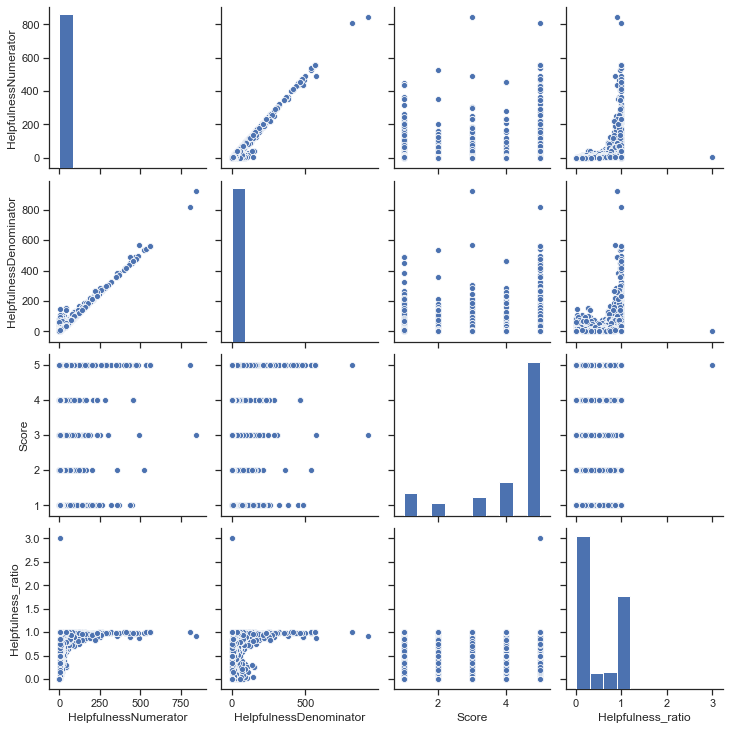

In [24]:
# Create Helpfulness ratio
df_reviews['Helpfulness_ratio']=df_reviews['HelpfulnessNumerator']/df_reviews['HelpfulnessDenominator']
# Replace Missing values or NA
df_reviews.Helpfulness_ratio.fillna(0,inplace=True)
sns.set(style='ticks', color_codes=True)
sns.pairplot(df_reviews,vars=['HelpfulnessNumerator','HelpfulnessDenominator', 'Score','Helpfulness_ratio'])

In [25]:
#Convert time from numeric to date-month-year

df_reviews['Date']=pd.to_datetime(df_reviews['Time'], unit='s')

df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Summary_text', 'Helpfulness_ratio', 'Date'],
      dtype='object')

In [26]:
df_reviews.Date.max()

Timestamp('2012-10-26 00:00:00')

In [27]:
df_reviews.Date.min()

Timestamp('1999-10-25 00:00:00')

In [28]:
df_reviews.Date.describe()

count                  426340
unique                   3099
top       2012-10-16 00:00:00
freq                      866
first     1999-10-25 00:00:00
last      2012-10-26 00:00:00
Name: Date, dtype: object

In [29]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 13 columns):
Id                        426340 non-null int64
ProductId                 426340 non-null object
UserId                    426340 non-null object
ProfileName               426326 non-null object
HelpfulnessNumerator      426340 non-null int64
HelpfulnessDenominator    426340 non-null int64
Score                     426340 non-null int64
Time                      426340 non-null int64
Summary                   426340 non-null object
Text                      426340 non-null object
Summary_text              426340 non-null object
Helpfulness_ratio         426340 non-null float64
Date                      426340 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 42.3+ MB


In [31]:
df_reviews.Score=df_reviews.Score.astype('category')

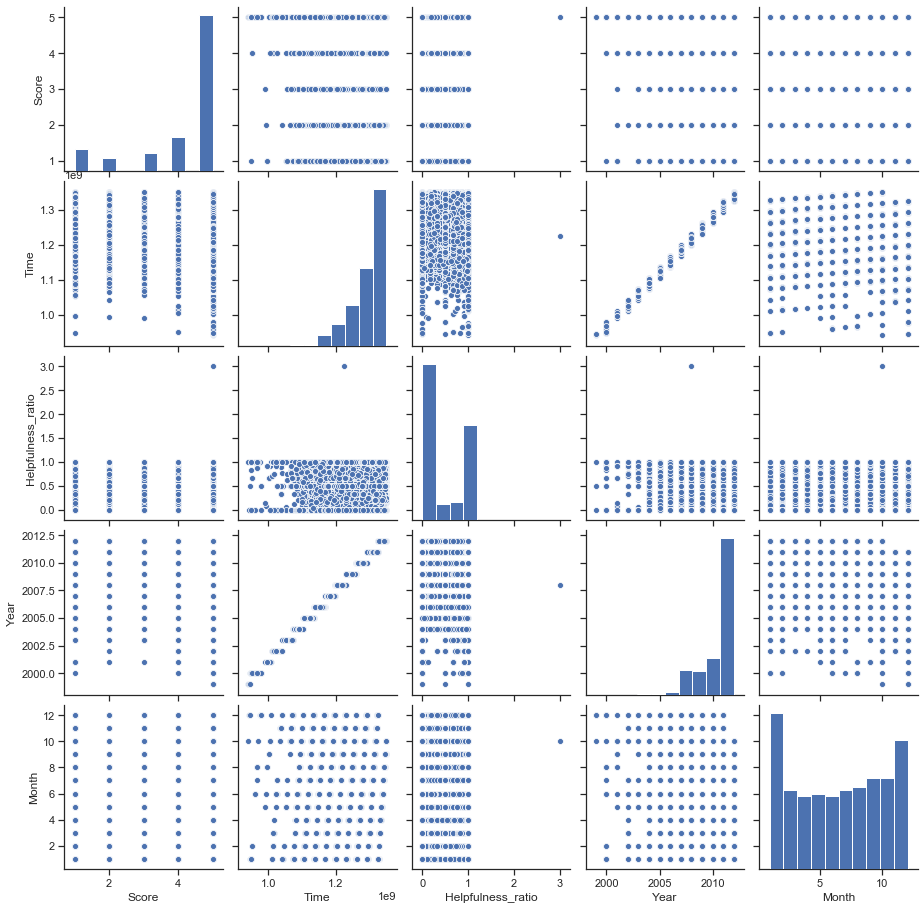

In [32]:
df_reviews['Year']=df_reviews["Date"].dt.year
df_reviews['Month']=df_reviews["Date"].dt.month
df_reviews['Month']=df_reviews.Month.astype('category')
df_reviews2=df_reviews.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Summary','Text'],axis=1)

sns.pairplot(df_reviews2)
             

In [33]:
# For year on year distribution

data_year_score=df_reviews2.groupby(['Year','Score']).size().reset_index()
data_year_score.head(1)

,Year,Score,0
0,1999,5,3


In [34]:
# For Monthly distribution 
data_month_score=df_reviews2.groupby(['Month','Score']).size().reset_index()

# Final Summary and Visualizations of cleaned Data

In [35]:
df_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_text,Helpfulness_ratio,Date,Year,Month
0,220291,B0034EDLS2,AVF82BC7S0IO7,Kbrown,0,0,5,1332806400,Very Good,I received this product early from the seller!...,Very Good I received this product early from t...,0.0,2012-03-27,2012,3
1,225833,B001I7HJE4,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1190160000,"Organic, Kosher, Tasty Assortment of Premium T...",*****<br />Numi's Collection Assortment Melang...,"Organic, Kosher, Tasty Assortment of Premium T...",1.0,2007-09-19,2007,9
2,350901,B000LKTB90,A1BBPP1EC75JX4,"Johan Bollen ""gekhond""",0,0,5,1285977600,"excellent gluten-free spaghetti: great taste, ...","I was very careful not to overcook this pasta,...","excellent gluten-free spaghetti: great taste, ...",0.0,2010-10-02,2010,10
3,299801,B001HXJPS2,A5QSI9MNS8NMS,M. Esaili,0,0,5,1338163200,Lindt is Lindt,Buying this multi-pack I was misled by the pic...,Lindt is Lindt Buying this multi-pack I was mi...,0.0,2012-05-28,2012,5
4,48472,B006H34CUS,A20IBAIRSNBEAQ,Chelsea,0,0,5,1343606400,YUM!!!!!,These bars are so good! I loved them warmed up...,YUM!!!!! These bars are so good! I loved them ...,0.0,2012-07-30,2012,7


In [36]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 15 columns):
Id                        426340 non-null int64
ProductId                 426340 non-null object
UserId                    426340 non-null object
ProfileName               426326 non-null object
HelpfulnessNumerator      426340 non-null int64
HelpfulnessDenominator    426340 non-null int64
Score                     426340 non-null category
Time                      426340 non-null int64
Summary                   426340 non-null object
Text                      426340 non-null object
Summary_text              426340 non-null object
Helpfulness_ratio         426340 non-null float64
Date                      426340 non-null datetime64[ns]
Year                      426340 non-null int64
Month                     426340 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 43.1+ MB


In [41]:
df_reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,Helpfulness_ratio,Year
count,426340.000000,426340.000000,426340.000000,4.263400e+05,426340.000000,426340.000000
mean,284300.799618,1.733159,2.220244,1.296222e+09,0.407594,2010.581670
std,164012.600602,7.328184,8.014894,4.808061e+07,0.461946,1.532932
min,1.000000,0.000000,0.000000,9.408096e+08,0.000000,1999.000000
25%,142363.750000,0.000000,0.000000,1.271203e+09,0.000000,2010.000000
50%,284308.500000,0.000000,1.000000,1.311034e+09,0.000000,2011.000000
75%,426183.250000,2.000000,2.000000,1.332720e+09,1.000000,2012.000000
max,568454.000000,844.000000,923.000000,1.351210e+09,3.000000,2012.000000


Text(0.5, 1.0, 'Rating over the Year')

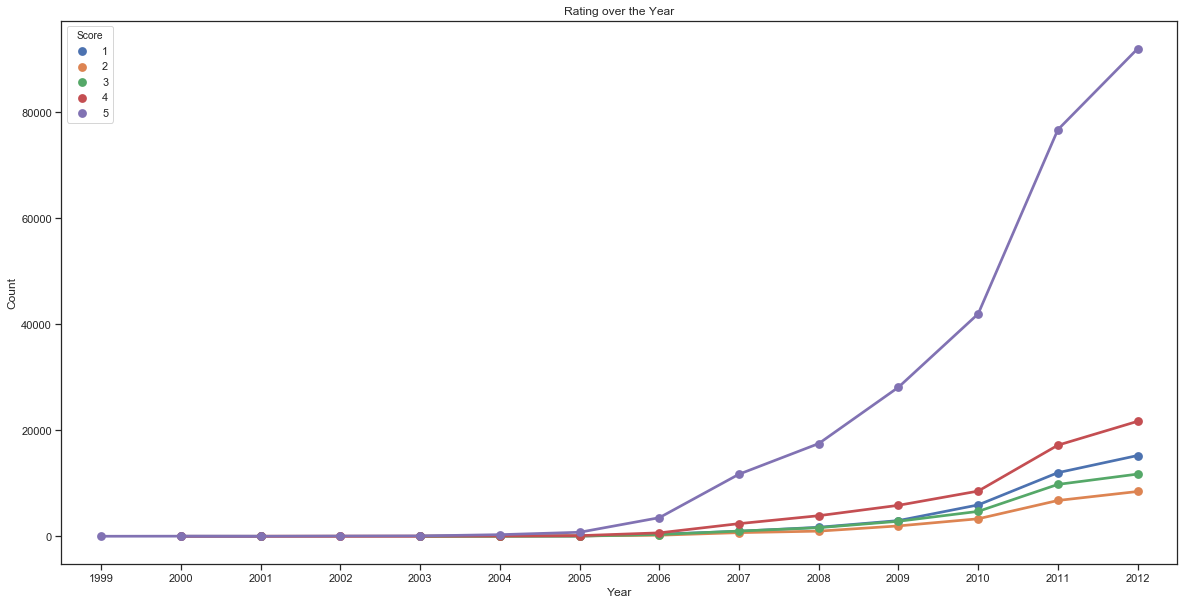

In [42]:
fig, ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data_year_score, x='Year', y=0,hue='Score', ax=ax)
plt.ylabel('Count')
plt.title("Rating over the Year")

Text(0.5, 1.0, 'Rating aggreagted by Month')

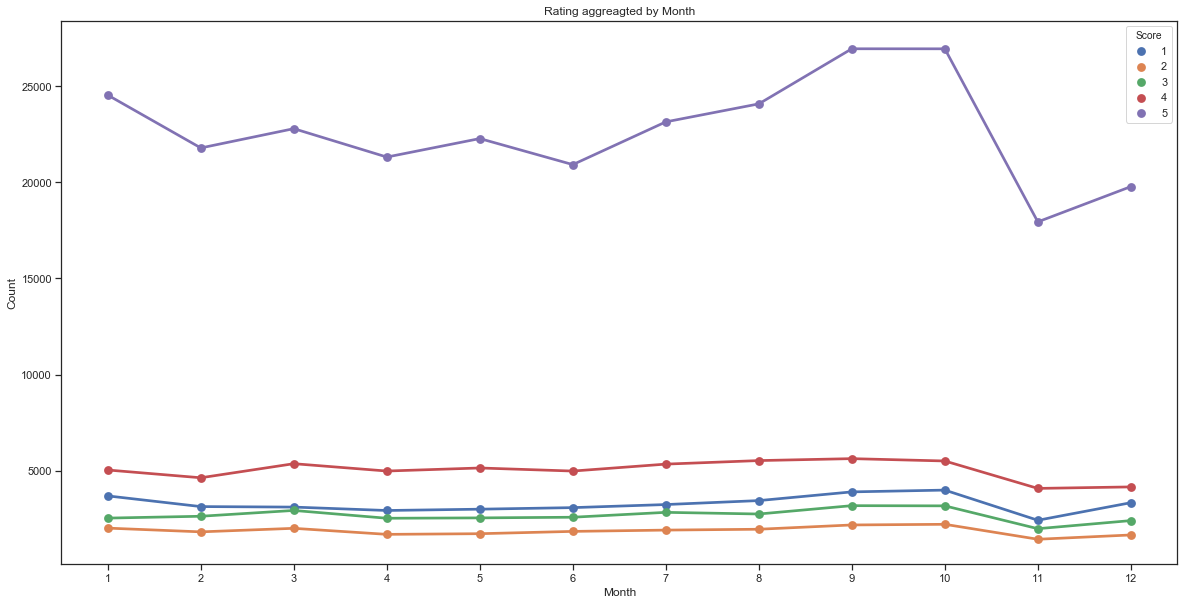

In [43]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data_month_score, x='Month',y=0, hue='Score')
plt.ylabel("Count")
plt.title("Rating aggreagted by Month")

Text(0.5, 1.0, 'Score distribution over month')

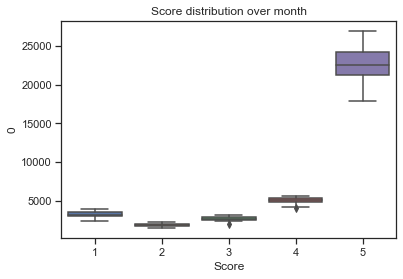

In [44]:
sns.boxplot(data=data_month_score,x='Score',y=0)
plt.title("Score distribution over month")

Text(0.5, 1.0, 'Score distribution over Year')

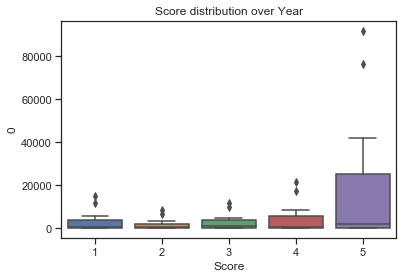

In [45]:
sns.boxplot(data=data_year_score,x="Score", y=0)
plt.title("Score distribution over Year")

Text(0.5, 1.0, 'Score statistics over year')

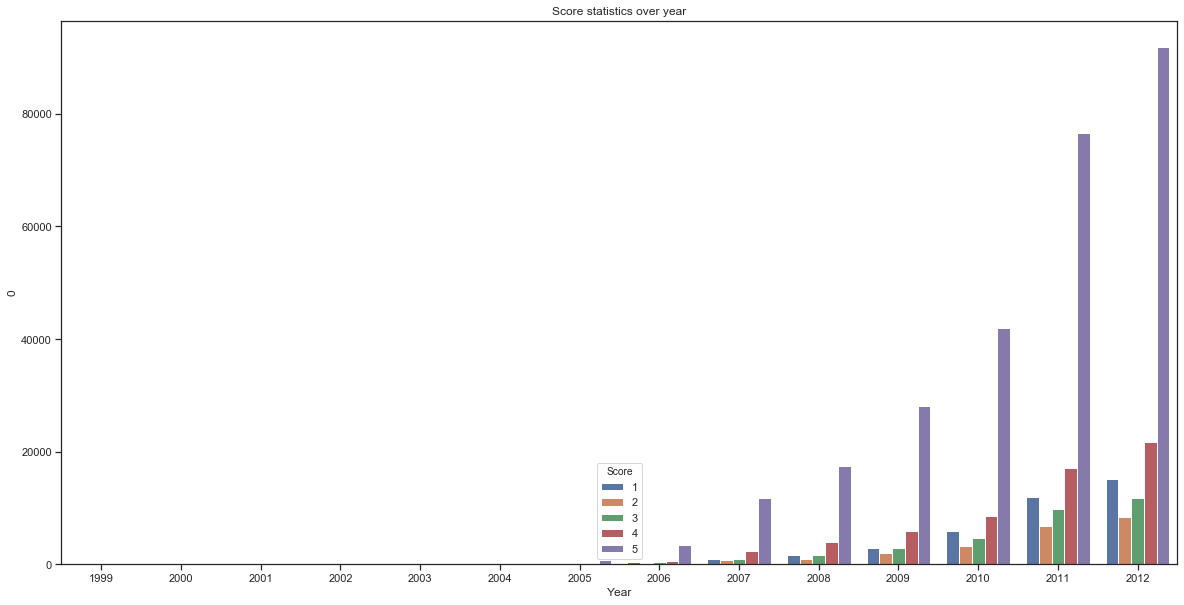

In [46]:
fig, ax=plt.subplots(figsize=(20,10))
sns.barplot(data=data_year_score, x='Year',y=0, hue='Score')
plt.title("Score statistics over year")